In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
import re
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
df_challenge = pd.read_csv("/content/drive/MyDrive/Challenge Platinum/Copy of data.csv", encoding='ISO-8859-1')
pd.set_option('display.max_colwidth', None)

In [ ]:
cols = df_challenge.columns[1:]

df_challenge['label'] = df_challenge[cols].any(axis=1).astype(int)
df_challenge = df_challenge.drop(columns=cols)
df_challenge.columns = ['text','label']
df_challenge['label'].replace({0:'positive', 1:'negative'}, inplace=True)
df_challenge.head()

text  \
0                                                                                                                      - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'   
1                                                                                                                                        RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'   
2  41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter   
3                                                                                                                                                                                     USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'   
4                                                                                                                                                                       USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'   

      label  
0  negative  
1  negative  
2  positive  
3  positive  
4  negative

In [ ]:
df_challenge.label.value_counts()

negative    7309
positive    5860
Name: label, dtype: int64

In [ ]:
df_indonlu_test = pd.read_csv("/content/drive/MyDrive/Challenge Platinum/Copy of test_preprocess.tsv", sep='\t', header= None)
df_indonlu_train = pd.read_csv("/content/drive/MyDrive/Challenge Platinum/Copy of train_preprocess.tsv", sep='\t', header= None)
df_indonlu_valid = pd.read_csv("/content/drive/MyDrive/Challenge Platinum/Copy of valid_preprocess.tsv", sep='\t', header= None)

df_indonlu = df_indonlu_train.append(df_indonlu_test, ignore_index=True)
df_indonlu = df_indonlu.append(df_indonlu_valid, ignore_index=True)
df_indonlu.columns = ['text','label']
df_indonlu = df_indonlu[df_indonlu['label']!='neutral']
df_indonlu.head()

text  \
0  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !   
2                                                                                                                                                                                                                              lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .   
3                                                                                                                                                                                                                                                                                                                         betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !   
4                                                                                                                                                                                                duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .   
5                                                                                                                                                                                                                                                     makanan beragam , harga makanan di food stall akan ditambahkan 10 % lagi di kasir , suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk .   

      label  
0  positive  
2  positive  
3  positive  
4  negative  
5  positive

In [ ]:
df_gabung = df_indonlu.append(df_challenge, ignore_index=True)

In [ ]:
df_gabung.head(10)

text  \
0  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !   
1                                                                                                                                                                                                                              lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .   
2                                                                                                                                                                                                                                                                                                                         betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !   
3                                                                                                                                                                                                duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik juga tidak telat . dasar mahasiswa .   
4                                                                                                                                                                                                                                                     makanan beragam , harga makanan di food stall akan ditambahkan 10 % lagi di kasir , suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk .   
5                                                                                                                                                                                                                                                                                                                                                                  pakai kartu kredit bca tidak untung malah rugi besar   
6                                                                                                                                                                                   tempat unik , bagus buat foto , makanan enak , pegawai ramah , bersih dan luas , wifi kencang . harga standar dan sesuai dengan tempat nya . ada menu masakan makanan barat dan indonesia . menu favorit lychee mojito dan spagheti   
7               saya bersama keluarga baru saja menikmati pengalaman kuliner yang menyenangkan di rm sari sunda di jalan . setiabudhi , bandung . tapi , karena tidak ada hubungan untuk rm sari sunda di jalan . setiabudhi , maka saya tuliskan di sini . jadi , maaf jika rekan-rekan pembaca ada yang bingung . beberapa hal yang saya suka dari restoran ini adalah bahwa pelayanan restoran ini terbilang cepat .   
8                                                                                                                                                                                                                                                                                                                                                                                                             bersyukur   
9                                                                                                                                                                                                                                                                                                    

In [ ]:
df_gabung.shape

(24562, 2)

## Data Cleansing

In [ ]:
def clean_text(text):

  # Memisahkan kata-kata setelah hashtag yang tersambung
  pattern = r"#([A-Z][a-z0-9]+)([A-Z][a-z0-9]+)"
  text = re.sub(pattern, r"# \1 \2", text)

  # Mengubah semua huruf menjadi huruf kecil
  text = text.lower()

  # Menghapus spasi di awal dan akhir text
  text = text.strip()

  # Menghapus kata 'user', 'rt', 'amp' dan 'x..'
  text = re.sub(r'\buser\b|\bRT\b|\bamp\b|(\bx[\da-f]{2})', ' ', text, flags=re.IGNORECASE)

  # Menghapus kata '\n'
  text = re.sub(r'\\n', ' ', text, flags=re.IGNORECASE)

  # Menghapus karakter non-alfanumerik
  text = re.sub(r'\W+', ' ', text)

  # Menghapus karakter berulang
  text = re.sub(r'(.)\1+', r'\1', text)

  # Menghapus karakter 'ø', 'ù', 'º', 'ð', dan lainnya
  text = re.sub(r'[øùºðµ¹ª³]', '', text, flags=re.IGNORECASE)
  text = re.sub(r'â', 'a', text, flags=re.IGNORECASE)

  # Menghapus spasi berlebih dengan mengganti beberapa spasi menjadi satu spasi
  text = re.sub(r'\s+', ' ', text).strip()

  # Menghapus seluruh kalimat yang hanya berisi spasi
  text = re.sub(r'^\s+$', '', text)

  return text



In [ ]:
df_challenge['text'] = df_challenge['text'].apply(clean_text)
df_indonlu['text'] = df_indonlu['text'].apply(clean_text)
df_gabung['text'] = df_gabung['text'].apply(clean_text)

In [ ]:
df_challenge.head()

text  \
0                                                                                                                          disat semua cowok berusaha melacak perhatian gue loe lantas remehkan perhatian yg gue kasih khusus ke elo basic elo cowok bego   
1                                                                                                                                               siapa yang telat ngasih tau elu edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga   
2  41 kadang aku berfikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu ningalkan aku sendirian ketika orangtuaku berencana berpisah ketika kakaku lebih memilih jadi kristen ketika aku anak ter   
3                                                                                                                                                                                           aku itu aku ku tau matamu sipit tapi diliat dari mana itu aku   
4                                                                                                                                                                          kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah   

      label  
0  negative  
1  negative  
2  positive  
3  positive  
4  negative

In [ ]:
df_indonlu.head()

text  \
0  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal   
2                                                                                                                                                                                                                      lokasi strategis di jalan sumatera bandung tempat nya nyaman terutama sofa di lantai 2 paela nya enak sangat pas dimakan dengan minum bir dingin apetiser nya juga enak enak   
3                                                                                                                                                                                                                                                                                                          betapa bahagia nya diri ini sat unboxing paket dan barang nya bagus menetapkan beli lagi   
4                                                                                                                                                                                          duh jadi mahasiswa jangan sombong dong kasih kartu kuning segala belajar dulu yang baik tidak usahlah ikut ikut politik nanti sudah selesai kuliah nya mau ikut politik juga tidak telat dasar mahasiswa   
5                                                                                                                                                                                                                                           makanan beragam harga makanan di fod stal akan ditambahkan 10 lagi di kasir suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk   

      label  
0  positive  
2  positive  
3  positive  
4  negative  
5  positive

In [ ]:
df_gabung.head()

text  \
0  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia harga cukup terjangkau jangan lewatkan tahu bletoka nya tidak kalah dengan yang asli dari tegal   
1                                                                                                                                                                                                                      lokasi strategis di jalan sumatera bandung tempat nya nyaman terutama sofa di lantai 2 paela nya enak sangat pas dimakan dengan minum bir dingin apetiser nya juga enak enak   
2                                                                                                                                                                                                                                                                                                          betapa bahagia nya diri ini sat unboxing paket dan barang nya bagus menetapkan beli lagi   
3                                                                                                                                                                                          duh jadi mahasiswa jangan sombong dong kasih kartu kuning segala belajar dulu yang baik tidak usahlah ikut ikut politik nanti sudah selesai kuliah nya mau ikut politik juga tidak telat dasar mahasiswa   
4                                                                                                                                                                                                                                           makanan beragam harga makanan di fod stal akan ditambahkan 10 lagi di kasir suasana ramai dan perlu perhatian untuk mendapatkan parkir dan tempat duduk   

      label  
0  positive  
1  positive  
2  positive  
3  negative  
4  positive

### Duplicate Handling

In [ ]:
print(df_challenge.duplicated().sum(), df_indonlu.duplicated().sum(), df_gabung.duplicated().sum())

276 73 350


In [ ]:
df_challenge.drop_duplicates(inplace=True)
df_indonlu.drop_duplicates(inplace=True)
df_gabung.drop_duplicates(inplace=True)

In [ ]:
print(df_challenge.duplicated().sum(), df_indonlu.duplicated().sum(), df_gabung.duplicated().sum())

0 0 0


### Null Value Handling

In [ ]:
print(df_challenge.isnull().sum(), df_indonlu.isnull().sum(), df_gabung.isnull().sum())

text     0
label    0
dtype: int64 text     0
label    0
dtype: int64 text     0
label    0
dtype: int64


## EDA

### Proporsi Label Positif dan Negatif

#### Dataset Challenge

In [ ]:
sentiment_counts = df_challenge['label'].value_counts().sort_index()

sentiment_labels = ['positive', 'negative']
sentiment_colors = ['red', 'lime']

total_data = sentiment_counts.sum()

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution: Dataset Challenge',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.add_annotation(text=f"Total Data: {total_data}",
                   x=0.5,
                   y=-0.2,
                   showarrow=False,
                   font=dict(size=14, color="black"))


fig.show()

#### Dataset Indonlu

In [ ]:
sentiment_counts = df_indonlu['label'].value_counts().sort_index()

sentiment_labels = ['positive', 'negative']
sentiment_colors = ['red', 'lime']

total_data = sentiment_counts.sum()

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution: Dataset Indonlu',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.add_annotation(text=f"Total Data: {total_data}",
                   x=0.5,
                   y=-0.2,
                   showarrow=False,
                   font=dict(size=14, color="black"))


fig.show()

#### Dataset Challenge dan Indonlu

In [ ]:
sentiment_counts = df_gabung['label'].value_counts().sort_index()

sentiment_labels = ['positive', 'negative']
sentiment_colors = ['red', 'lime']

total_data = sentiment_counts.sum()

fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution: Dataset Challenge dan Indonlu',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
    )
)

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.add_annotation(text=f"Total Data: {total_data}",
                   x=0.5,
                   y=-0.2,
                   showarrow=False,
                   font=dict(size=14, color="black"))


fig.show()

### Frekuensi Kata dan WordCloud

In [ ]:
from nltk.stem import WordNetLemmatizer

def get_all_string(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = re.sub('[^A-Za-z0-9 ]+', '', sentence)
    sentence = re.sub(r'http\S+', '', sentence)
    sentence = sentence.lower()
    return sentence

def get_word(sentence):
    return nltk.RegexpTokenizer(r'\w+').tokenize(sentence)

def remove_stopword(word_tokens):
    stopword_list = set(stopwords.words('indonesian'))
    stopword_list.add("rt")
    stopword_list.add("user")
    stopword_list.add("yg")
    stopword_list.add("nya")
    stopword_list.add("ya")
    stopword_list.add("sih")
    stopword_list.add("ga")
    stopword_list.add("gak")
    stopword_list.add("aja")
    stopword_list.add("lu")
    stopword_list.add("lo")
    stopword_list.add("si")
    stopword_list.add("gue")
    stopword_list.add("gua")
    stopword_list.add("kalo")
    stopword_list.add("banget")
    filtered_tokens = []

    for word in word_tokens:
        if word not in stopword_list:
            filtered_tokens.append(word)
    return filtered_tokens

def lemmatize_words(filtered_tokens):
    lemm = WordNetLemmatizer()
    cleaned_tokens = [lemm.lemmatize(word) for word in filtered_tokens]
    return cleaned_tokens

def create_freq_df(cleaned_tokens):
    fdist = nltk.FreqDist(cleaned_tokens)
    freq_df = pd.DataFrame.from_dict(fdist, orient='index')
    freq_df.columns = ['Frequency']
    freq_df.index.name = 'Term'
    freq_df = freq_df.sort_values(by=['Frequency'], ascending=False)
    freq_df = freq_df.reset_index()
    return freq_df

def preprocess(series):
    all_string = get_all_string(series)
    words = get_word(all_string)
    filtered_tokens = remove_stopword(words)
    cleaned_tokens = lemmatize_words(filtered_tokens)
    return cleaned_tokens


def plot_text_distribution(x_df, y_df, color, title, xaxis_text, yaxis_text):
    fig = px.bar(x=x_df,
                y=y_df,
                color=y_df,
                text=y_df,
                color_continuous_scale=color)

    fig.update_layout(
        title_text=title,
        template='plotly_white',
        xaxis=dict(
            title=xaxis_text,
        ),
        yaxis=dict(
            title=yaxis_text,
        )
    )

    fig.update_traces(marker_line_color='black',
                    marker_line_width=1.5,
                    opacity=0.8)

    fig.show()

def create_wordcloud(freq_df, title, color):

    data = freq_df.set_index('Term').to_dict()['Frequency']

    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800,
               height=400,
               max_words=100,
               colormap= color,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888,
               background_color='white').generate_from_frequencies(data)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

#### Dataset Challenge

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


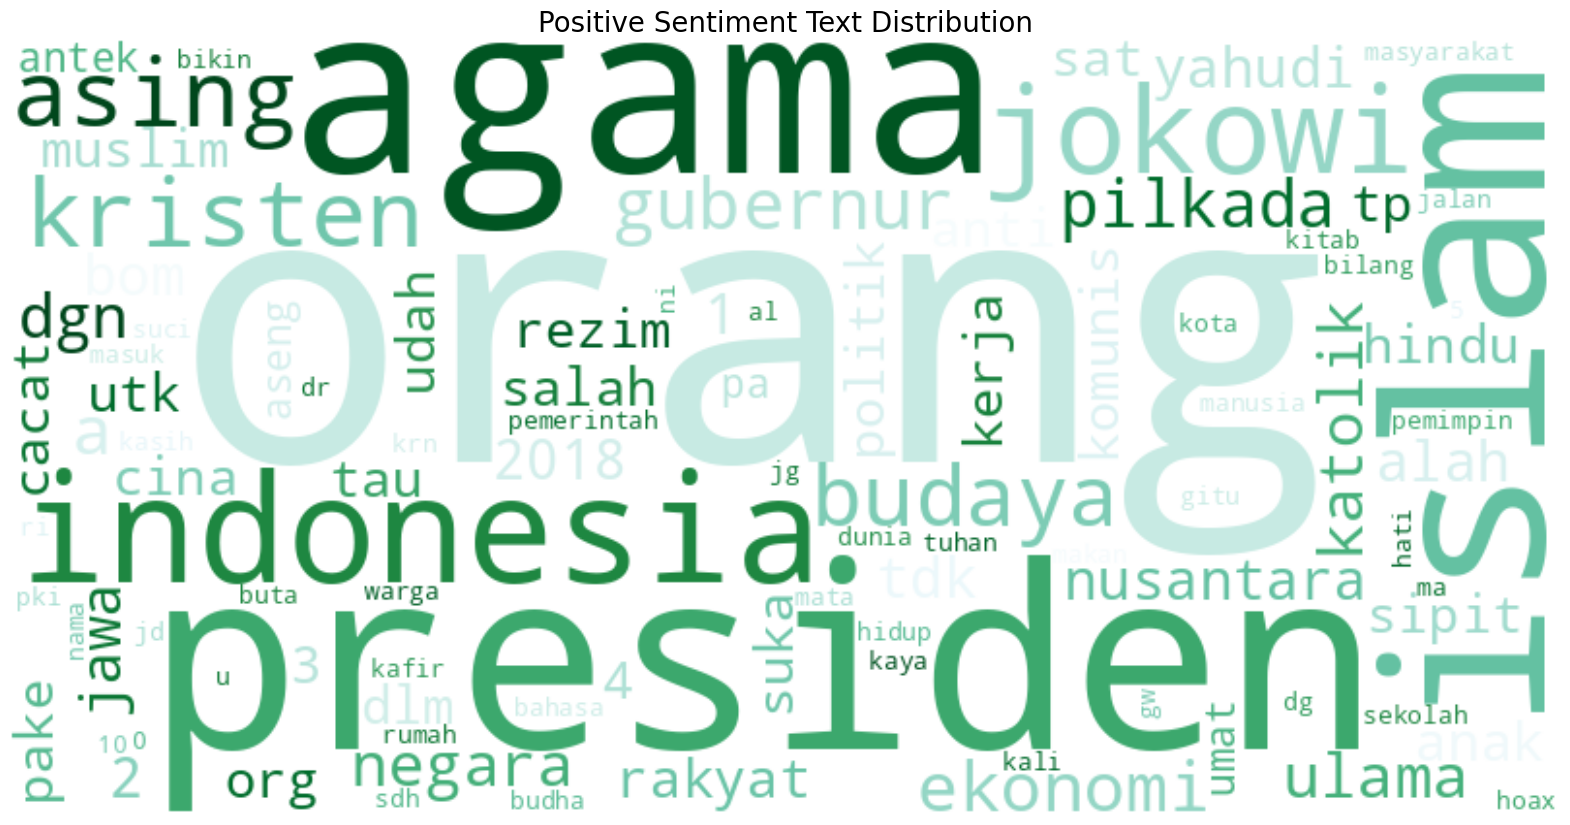

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

positive_words = preprocess(df_challenge.loc[df_challenge['label'] == 'positive']['text'])
positive_words_df = create_freq_df(positive_words)
top10_positive_words = positive_words_df[:10]

plot_text_distribution(top10_positive_words['Term'], top10_positive_words['Frequency'],
                  'Greens', 'Top 10 Positive Sentiment Text Distribution', 'Text', 'Number of Texts')
create_wordcloud(positive_words_df, 'Positive Sentiment Text Distribution', 'BuGn')

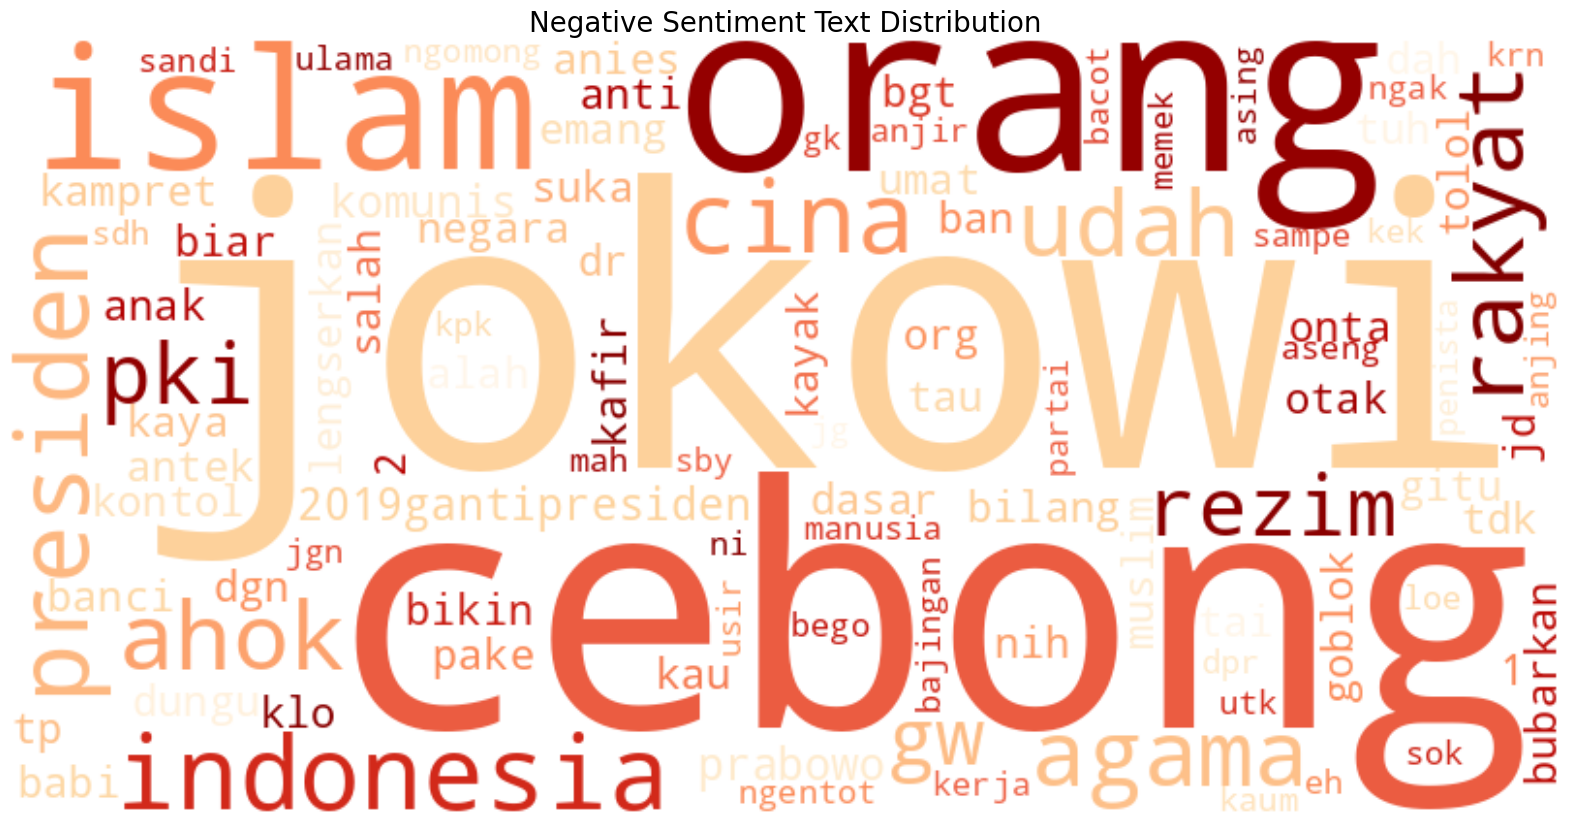

In [ ]:
negative_words = preprocess(df_challenge.loc[df_challenge['label'] == 'negative']['text'])
negative_words_df = create_freq_df(negative_words)
top10_negative_words = negative_words_df[:10]

plot_text_distribution(top10_negative_words['Term'], top10_negative_words['Frequency'],
                  'Reds', 'Top 10 Negative Sentiment Text Distribution', 'Text', 'Number of Texts')
create_wordcloud(negative_words_df, 'Negative Sentiment Text Distribution', 'OrRd')

#### Dataset Indonlu

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


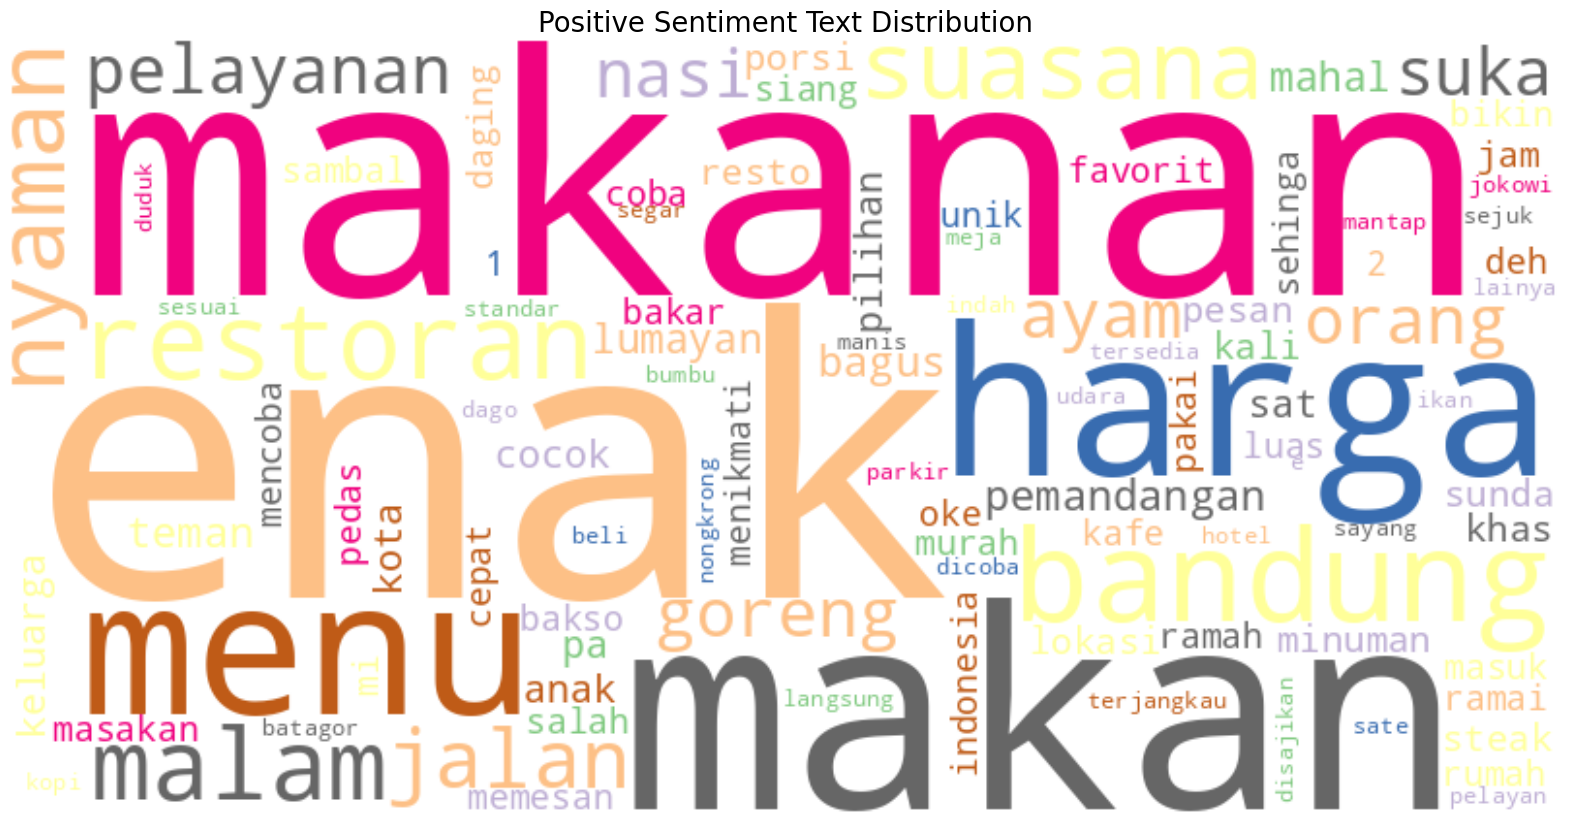

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

all_words = preprocess(df_indonlu['text'])
all_words_df = create_freq_df(all_words)
top10_all_words = all_words_df[:10]

plot_text_distribution(top10_all_words['Term'], top10_all_words['Frequency'],
                  'agsunset', 'Top 10 Positive Sentiment Text Distribution', 'Text', 'Number of Texts')
create_wordcloud(all_words_df, 'Positive Sentiment Text Distribution', 'Accent')

##### Label Positif dan Negatif

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


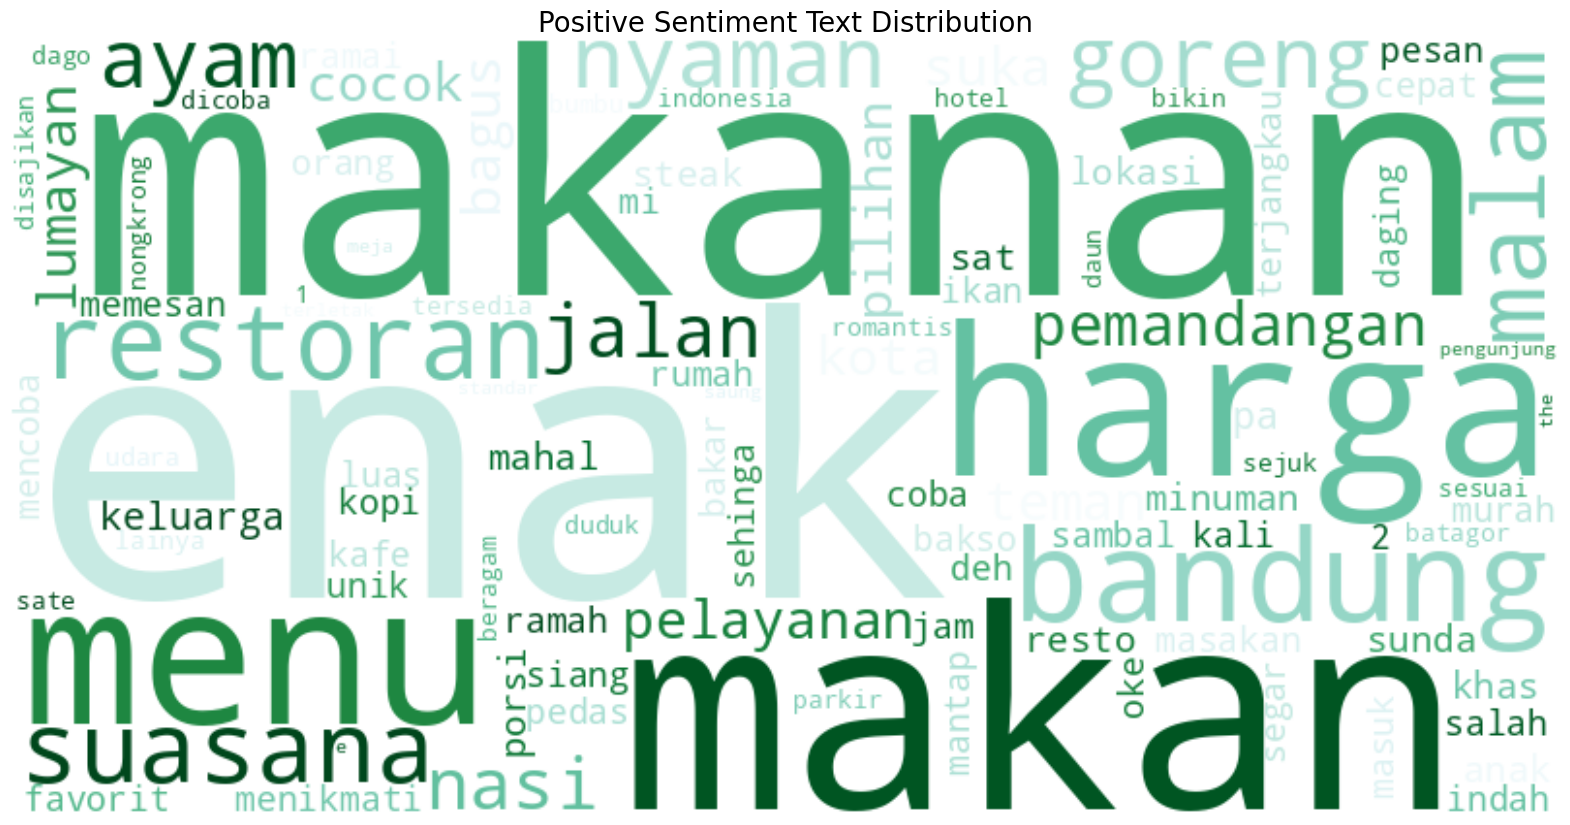

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

positive_words = preprocess(df_indonlu.loc[df_indonlu['label'] == 'positive']['text'])
positive_words_df = create_freq_df(positive_words)
top10_positive_words = positive_words_df[:10]

plot_text_distribution(top10_positive_words['Term'], top10_positive_words['Frequency'],
                  'Greens', 'Top 10 Positive Sentiment Text Distribution', 'Text', 'Number of Texts')
create_wordcloud(positive_words_df, 'Positive Sentiment Text Distribution', 'BuGn')

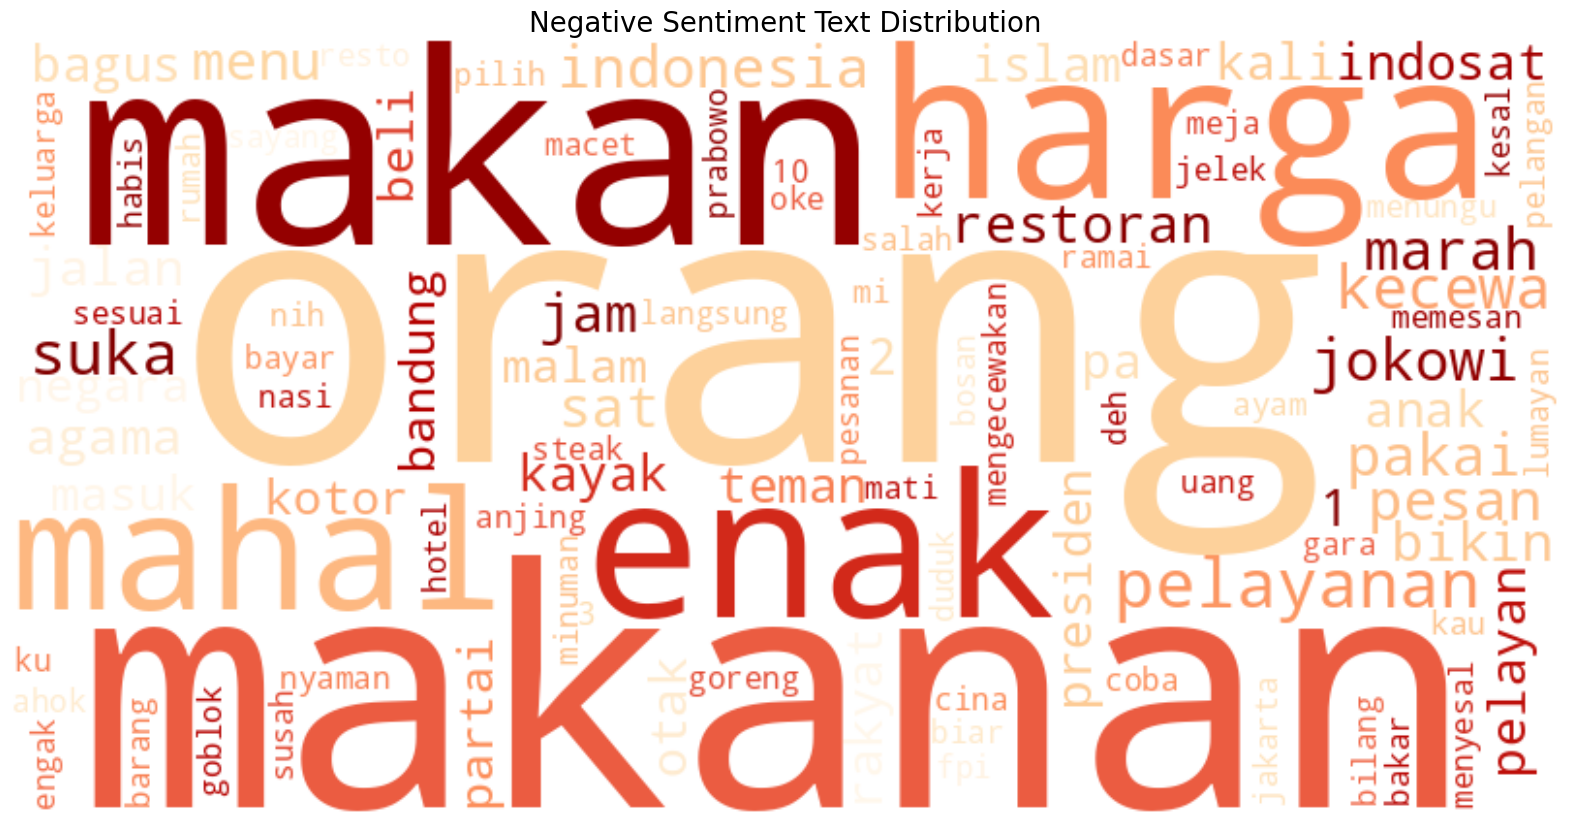

In [ ]:
negative_words = preprocess(df_indonlu.loc[df_indonlu['label'] == 'negative']['text'])
negative_words_df = create_freq_df(negative_words)
top10_negative_words = negative_words_df[:10]

plot_text_distribution(top10_negative_words['Term'], top10_negative_words['Frequency'],
                  'Reds', 'Top 10 Negative Sentiment Text Distribution', 'Text', 'Number of Texts')
create_wordcloud(negative_words_df, 'Negative Sentiment Text Distribution', 'OrRd')

#### Dataset Challenge dan Indonlu

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


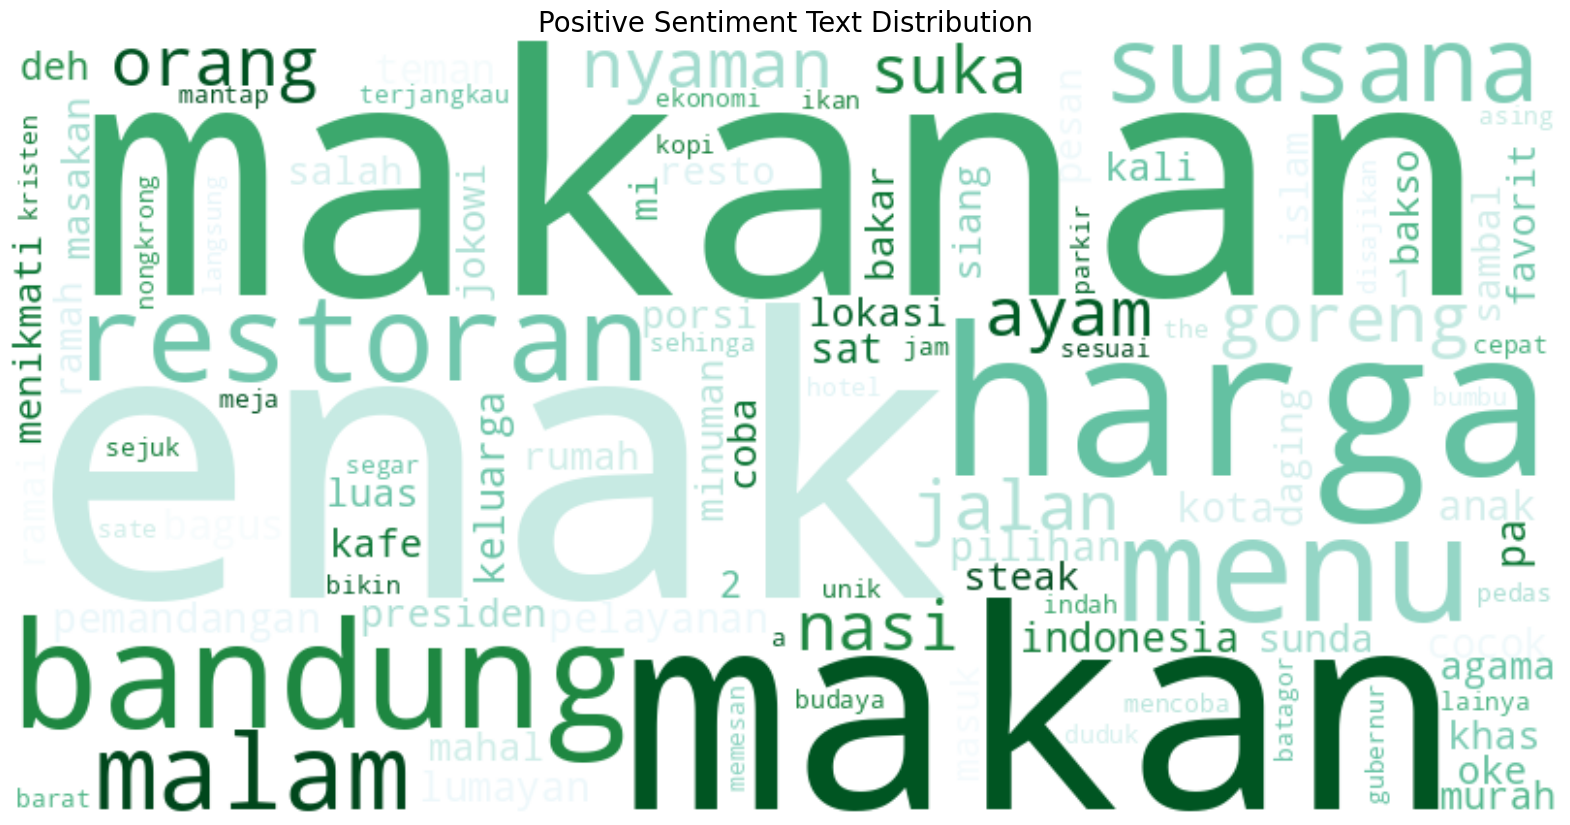

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

positive_words = preprocess(df_gabung.loc[df_gabung['label'] == 'positive']['text'])
positive_words_df = create_freq_df(positive_words)
top10_positive_words = positive_words_df[:10]

plot_text_distribution(top10_positive_words['Term'], top10_positive_words['Frequency'],
                  'Greens', 'Top 10 Positive Sentiment Text Distribution', 'Text', 'Number of Texts')
create_wordcloud(positive_words_df, 'Positive Sentiment Text Distribution', 'BuGn')

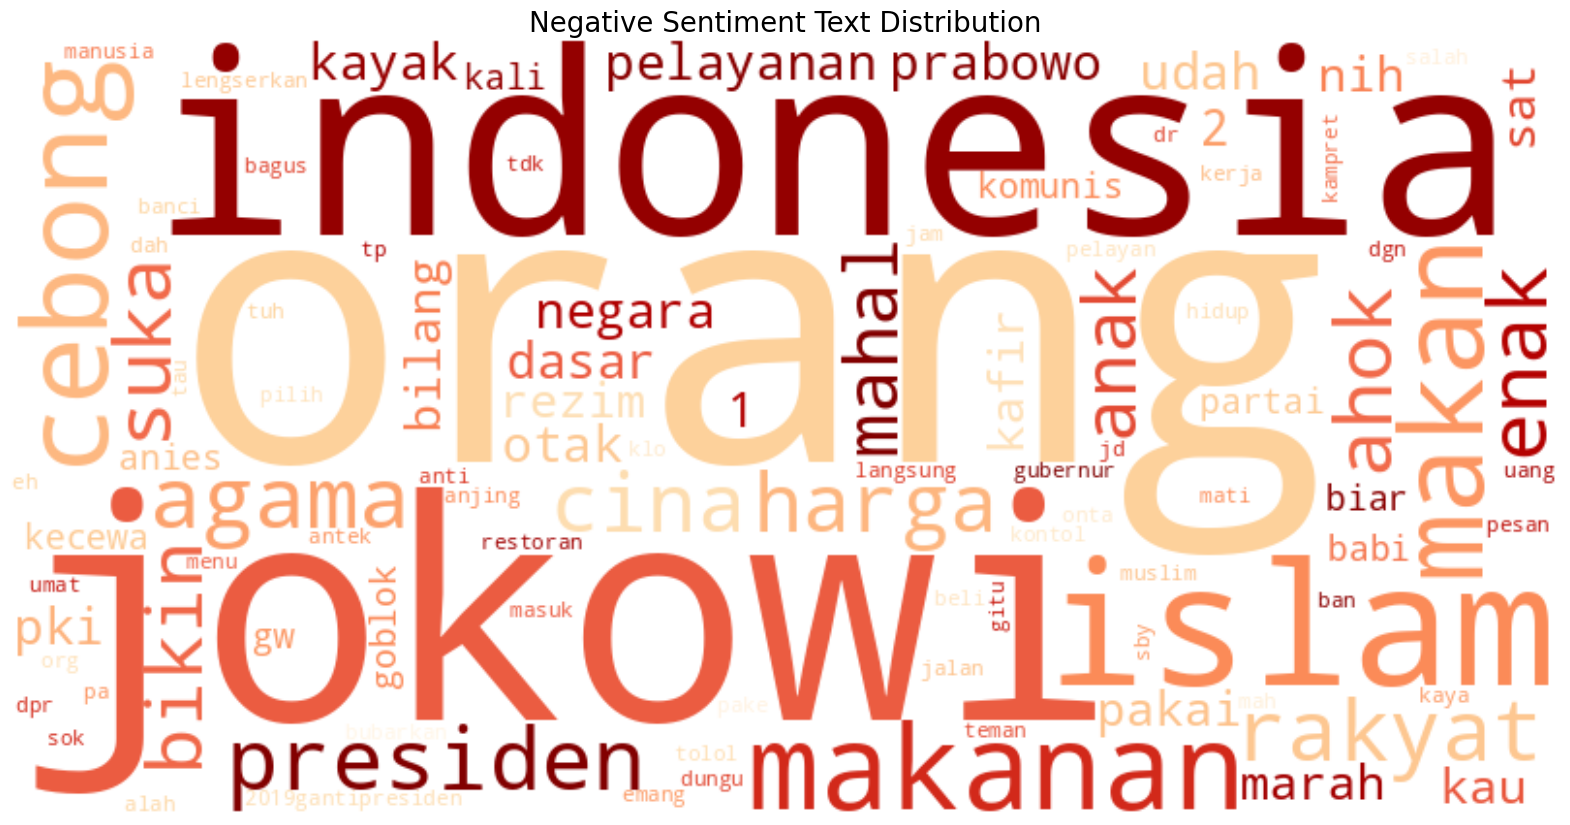

In [ ]:
negative_words = preprocess(df_gabung.loc[df_gabung['label'] == 'negative']['text'])
negative_words_df = create_freq_df(negative_words)
top10_negative_words = negative_words_df[:10]

plot_text_distribution(top10_negative_words['Term'], top10_negative_words['Frequency'],
                  'Reds', 'Top 10 Negative Sentiment Text Distribution', 'Text', 'Number of Texts')
create_wordcloud(negative_words_df, 'Negative Sentiment Text Distribution', 'OrRd')

## Report EPOCH

In [ ]:
import pandas as pd

# Define the data for all epochs
data = [
    {'Epoch': 1, 'loss': 0.4901, 'accuracy': 0.7704, 'precision': 0.7704, 'recall': 0.7704,
     'val_loss': 0.3550, 'val_accuracy': 0.8438, 'val_precision': 0.8438, 'val_recall': 0.8438},
    {'Epoch': 2, 'loss': 0.3145, 'accuracy': 0.8731, 'precision': 0.8731, 'recall': 0.8731,
     'val_loss': 0.3057, 'val_accuracy': 0.8613, 'val_precision': 0.8613, 'val_recall': 0.8613},
    {'Epoch': 3, 'loss': 0.2442, 'accuracy': 0.9081, 'precision': 0.9081, 'recall': 0.9081,
     'val_loss': 0.2774, 'val_accuracy': 0.8820, 'val_precision': 0.8820, 'val_recall': 0.8820},
    {'Epoch': 4, 'loss': 0.2133, 'accuracy': 0.9213, 'precision': 0.9213, 'recall': 0.9213,
     'val_loss': 0.2563, 'val_accuracy': 0.8925, 'val_precision': 0.8925, 'val_recall': 0.8925},
    {'Epoch': 5, 'loss': 0.1891, 'accuracy': 0.9309, 'precision': 0.9309, 'recall': 0.9309,
     'val_loss': 0.2536, 'val_accuracy': 0.8938, 'val_precision': 0.8938, 'val_recall': 0.8938},
    {'Epoch': 6, 'loss': 0.1730, 'accuracy': 0.9373, 'precision': 0.9373, 'recall': 0.9373,
     'val_loss': 0.2531, 'val_accuracy': 0.8986, 'val_precision': 0.8986, 'val_recall': 0.8986},
    {'Epoch': 7, 'loss': 0.1602, 'accuracy': 0.9425, 'precision': 0.9425, 'recall': 0.9425,
     'val_loss': 0.2528, 'val_accuracy': 0.8991, 'val_precision': 0.8991, 'val_recall': 0.8991},
    {'Epoch': 8, 'loss': 0.1500, 'accuracy': 0.9466, 'precision': 0.9466, 'recall': 0.9466,
     'val_loss': 0.2492, 'val_accuracy': 0.8960, 'val_precision': 0.8960, 'val_recall': 0.8960},
    {'Epoch': 9, 'loss': 0.1403, 'accuracy': 0.9503, 'precision': 0.9503, 'recall': 0.9503,
     'val_loss': 0.2573, 'val_accuracy': 0.8986, 'val_precision': 0.8986, 'val_recall': 0.8986},
    {'Epoch': 10, 'loss': 0.1330, 'accuracy': 0.9531, 'precision': 0.9531, 'recall': 0.9531,
     'val_loss': 0.2533, 'val_accuracy': 0.9043, 'val_precision': 0.9043, 'val_recall': 0.9043},
    {'Epoch': 11, 'loss': 0.1285, 'accuracy': 0.9572, 'precision': 0.9572, 'recall': 0.9572,
     'val_loss': 0.2548, 'val_accuracy': 0.9000, 'val_precision': 0.9000, 'val_recall': 0.9000},
    {'Epoch': 12, 'loss': 0.1221, 'accuracy': 0.9595, 'precision': 0.9595, 'recall': 0.9595,
     'val_loss': 0.2649, 'val_accuracy': 0.8973, 'val_precision': 0.8973, 'val_recall': 0.8973},
    {'Epoch': 13, 'loss': 0.1152, 'accuracy': 0.9615, 'precision': 0.9615, 'recall': 0.9615,
     'val_loss': 0.2640, 'val_accuracy': 0.8995, 'val_precision': 0.8995, 'val_recall': 0.8995},
    {'Epoch': 14, 'loss': 0.1104, 'accuracy': 0.9630, 'precision': 0.9630, 'recall': 0.9630,
     'val_loss': 0.2660, 'val_accuracy': 0.8982, 'val_precision': 0.8982, 'val_recall': 0.8982},
    {'Epoch': 15, 'loss': 0.1062, 'accuracy': 0.9643, 'precision': 0.9643, 'recall': 0.9643,
     'val_loss': 0.2625, 'val_accuracy': 0.9013, 'val_precision': 0.9013, 'val_recall': 0.9013},
    {'Epoch': 16, 'loss': 0.1004, 'accuracy': 0.9671, 'precision': 0.9671, 'recall': 0.9671,
     'val_loss': 0.2723, 'val_accuracy': 0.8964, 'val_precision': 0.8964, 'val_recall': 0.8964},
    {'Epoch': 17, 'loss': 0.0991, 'accuracy': 0.9676, 'precision': 0.9676, 'recall': 0.9676,
     'val_loss': 0.2794, 'val_accuracy': 0.8964, 'val_precision': 0.8964, 'val_recall': 0.8964},
    {'Epoch': 18, 'loss': 0.0954, 'accuracy': 0.9695, 'precision': 0.9695, 'recall': 0.9695,
     'val_loss': 0.2833, 'val_accuracy': 0.9000, 'val_precision': 0.900}]


In [ ]:
df_epoch1 = pd.DataFrame()

In [ ]:
df_epoch1 = data

In [ ]:
df_epoch1.head()

AttributeError: ignored

In [ ]:
epoch = [
    {'Epoch': 1, 'loss': 0.4901, 'accuracy': 0.7704, 'precision': 0.7704, 'recall': 0.7704, 'val_loss': 0.3550, 'val_accuracy': 0.8438, 'val_precision': 0.8438, 'val_recall': 0.8438},
    {'Epoch': 2, 'loss': 0.3145, 'accuracy': 0.8731, 'precision': 0.8731, 'recall': 0.8731, 'val_loss': 0.3057, 'val_accuracy': 0.8613, 'val_precision': 0.8613, 'val_recall': 0.8613},
    {'Epoch': 3, 'loss': 0.2442, 'accuracy': 0.9081, 'precision': 0.9081, 'recall': 0.9081, 'val_loss': 0.2774, 'val_accuracy': 0.8820, 'val_precision': 0.8820, 'val_recall': 0.8820},
    {'Epoch': 4, 'loss': 0.2133, 'accuracy': 0.9213, 'precision': 0.9213, 'recall': 0.9213, 'val_loss': 0.2563, 'val_accuracy': 0.8925, 'val_precision': 0.8925, 'val_recall': 0.8925},
    {'Epoch': 5, 'loss': 0.1891, 'accuracy': 0.9309, 'precision': 0.9309, 'recall': 0.9309, 'val_loss': 0.2536, 'val_accuracy': 0.8938, 'val_precision': 0.8938, 'val_recall': 0.8938},
    {'Epoch': 6, 'loss': 0.1730, 'accuracy': 0.9373, 'precision': 0.9373, 'recall': 0.9373, 'val_loss': 0.2531, 'val_accuracy': 0.8986, 'val_precision': 0.8986, 'val_recall': 0.8986},
    {'Epoch': 7, 'loss': 0.1602, 'accuracy': 0.9425, 'precision': 0.9425, 'recall': 0.9425, 'val_loss': 0.2528, 'val_accuracy': 0.8991, 'val_precision': 0.8991, 'val_recall': 0.8991},
    {'Epoch': 8, 'loss': 0.1500, 'accuracy': 0.9466, 'precision': 0.9466, 'recall': 0.9466, 'val_loss': 0.2492, 'val_accuracy': 0.8960, 'val_precision': 0.8960, 'val_recall': 0.8960},
    {'Epoch': 9, 'loss': 0.1403, 'accuracy': 0.9503, 'precision': 0.9503, 'recall': 0.9503, 'val_loss': 0.2573, 'val_accuracy': 0.8986, 'val_precision': 0.8986, 'val_recall': 0.8986},
    {'Epoch': 10, 'loss': 0.1330, 'accuracy': 0.9531, 'precision': 0.9531, 'recall': 0.9531, 'val_loss': 0.2533, 'val_accuracy': 0.9043, 'val_precision': 0.9043, 'val_recall': 0.9043},
    {'Epoch': 11, 'loss': 0.1285, 'accuracy': 0.9572, 'precision': 0.9572, 'recall': 0.9572, 'val_loss': 0.2548, 'val_accuracy': 0.9000, 'val_precision': 0.9000, 'val_recall': 0.9000},
    {'Epoch': 12, 'loss': 0.1221, 'accuracy': 0.9595, 'precision': 0.9595, 'recall': 0.9595, 'val_loss': 0.2649, 'val_accuracy': 0.8973, 'val_precision': 0.8973, 'val_recall': 0.8973},
    {'Epoch': 13, 'loss': 0.1152, 'accuracy': 0.9615, 'precision': 0.9615, 'recall': 0.9615, 'val_loss': 0.2640, 'val_accuracy': 0.8995, 'val_precision': 0.8995, 'val_recall': 0.8995},
    {'Epoch': 14, 'loss': 0.1104, 'accuracy': 0.9630, 'precision': 0.9630, 'recall': 0.9630, 'val_loss': 0.2660, 'val_accuracy': 0.8982, 'val_precision': 0.8982, 'val_recall': 0.8982},
    {'Epoch': 15, 'loss': 0.1062, 'accuracy': 0.9643, 'precision': 0.9643, 'recall': 0.9643, 'val_loss': 0.2625, 'val_accuracy': 0.9013, 'val_precision': 0.9013, 'val_recall': 0.9013},
    {'Epoch': 16, 'loss': 0.1004, 'accuracy': 0.9671, 'precision': 0.9671, 'recall': 0.9671, 'val_loss': 0.2723, 'val_accuracy': 0.8964, 'val_precision': 0.8964, 'val_recall': 0.8964},
    {'Epoch': 17, 'loss': 0.0991, 'accuracy': 0.9676, 'precision': 0.9676, 'recall': 0.9676, 'val_loss': 0.2794, 'val_accuracy': 0.8964, 'val_precision': 0.8964, 'val_recall': 0.8964},
    {'Epoch': 18, 'loss': 0.0954, 'accuracy': 0.9695, 'precision': 0.9695, 'recall': 0.9695, 'val_loss': 0.2833, 'val_accuracy': 0.9000, 'val_precision': 0.9000, 'val_recall': 0.9000},
    {'Epoch': 19, 'loss': 0.0954, 'accuracy': 0.9695, 'precision': 0.9695, 'recall': 0.9695, 'val_loss': 0.2833, 'val_accuracy': 0.9000, 'val_precision': 0.9000, 'val_recall': 0.9000},
    {'Epoch': 19, 'loss': 0.0913, 'accuracy': 0.9709, 'precision': 0.9709, 'recall': 0.9709, 'val_loss': 0.2835, 'val_accuracy': 0.8973, 'val_precision': 0.8973, 'val_recall': 0.8973},
    {'Epoch': 20, 'loss': 0.0881, 'accuracy': 0.9732, 'precision': 0.9732, 'recall': 0.9732, 'val_loss': 0.2965, 'val_accuracy': 0.8960, 'val_precision': 0.8960, 'val_recall': 0.8960}
]

In [ ]:
dfe = pd.DataFrame(epoch)

In [ ]:
dfe.head(
)

Epoch    loss  accuracy  precision  recall  val_loss  val_accuracy  \
0      1  0.4901    0.7704     0.7704  0.7704    0.3550        0.8438   
1      2  0.3145    0.8731     0.8731  0.8731    0.3057        0.8613   
2      3  0.2442    0.9081     0.9081  0.9081    0.2774        0.8820   
3      4  0.2133    0.9213     0.9213  0.9213    0.2563        0.8925   
4      5  0.1891    0.9309     0.9309  0.9309    0.2536        0.8938   

   val_precision  val_recall  
0         0.8438      0.8438  
1         0.8613      0.8613  
2         0.8820      0.8820  
3         0.8925      0.8925  
4         0.8938      0.8938

In [ ]:
dfe

Epoch    loss  accuracy  precision  recall  val_loss  val_accuracy  \
0       1  0.4901    0.7704     0.7704  0.7704    0.3550        0.8438   
1       2  0.3145    0.8731     0.8731  0.8731    0.3057        0.8613   
2       3  0.2442    0.9081     0.9081  0.9081    0.2774        0.8820   
3       4  0.2133    0.9213     0.9213  0.9213    0.2563        0.8925   
4       5  0.1891    0.9309     0.9309  0.9309    0.2536        0.8938   
5       6  0.1730    0.9373     0.9373  0.9373    0.2531        0.8986   
6       7  0.1602    0.9425     0.9425  0.9425    0.2528        0.8991   
7       8  0.1500    0.9466     0.9466  0.9466    0.2492        0.8960   
8       9  0.1403    0.9503     0.9503  0.9503    0.2573        0.8986   
9      10  0.1330    0.9531     0.9531  0.9531    0.2533        0.9043   
10     11  0.1285    0.9572     0.9572  0.9572    0.2548        0.9000   
11     12  0.1221    0.9595     0.9595  0.9595    0.2649        0.8973   
12     13  0.1152    0.9615     0.9615  0.9615    0.2640        0.8995   
13     14  0.1104    0.9630     0.9630  0.9630    0.2660        0.8982   
14     15  0.1062    0.9643     0.9643  0.9643    0.2625        0.9013   
15     16  0.1004    0.9671     0.9671  0.9671    0.2723        0.8964   
16     17  0.0991    0.9676     0.9676  0.9676    0.2794        0.8964   
17     18  0.0954    0.9695     0.9695  0.9695    0.2833        0.9000   
18     19  0.0954    0.9695     0.9695  0.9695    0.2833        0.9000   
19     19  0.0913    0.9709     0.9709  0.9709    0.2835        0.8973   
20     20  0.0881    0.9732     0.9732  0.9732    0.2965        0.8960   

    val_precision  val_recall  
0          0.8438      0.8438  
1          0.8613      0.8613  
2          0.8820      0.8820  
3          0.8925      0.8925  
4          0.8938      0.8938  
5          0.8986      0.8986  
6          0.8991      0.8991  
7          0.8960      0.8960  
8          0.8986      0.8986  
9          0.9043      0.9043  
10         0.9000      0.9000  
11         0.8973      0.8973  
12         0.8995      0.8995  
13         0.8982      0.8982  
14         0.9013      0.9013  
15         0.8964      0.8964  
16         0.8964      0.8964  
17         0.9000      0.9000  
18         0.9000      0.9000  
19         0.8973      0.8973  
20         0.8960      0.8960

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dfe, *['Epoch'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dfe, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dfe, *['accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dfe, *['precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfe, *['Epoch'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfe, *['loss'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfe, *['accuracy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dfe, *['precision'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dfe, *[[['Epoch', 'loss'], ['loss', 'accuracy'], ['accuracy', 'precision'], ['precision', 'recall']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfe, *['Epoch', 'loss', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfe, *['Epoch', 'val_loss', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfe, *['Epoch', 'val_accuracy', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(dfe, *['Epoch', 'val_precision', None], **{})
chart

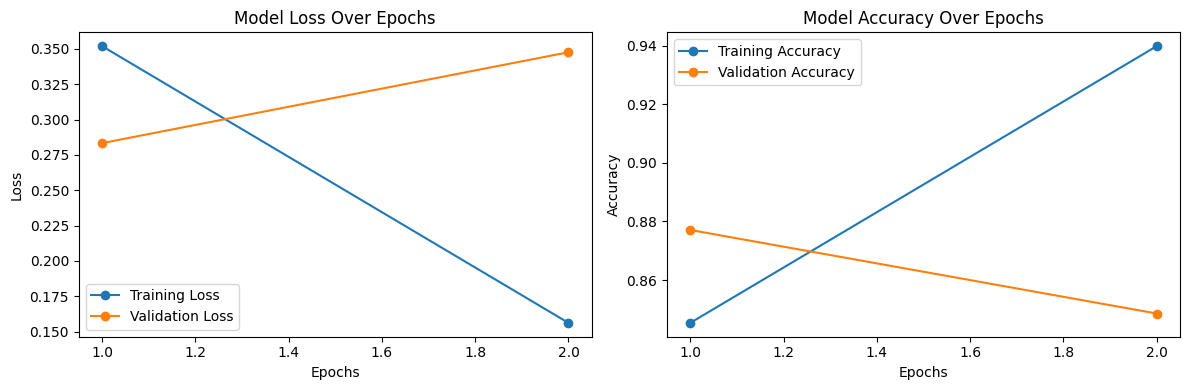

In [ ]:
import matplotlib.pyplot as plt

# Define the training history (loss and accuracy values over epochs)
loss = [0.3520, 0.1562]
accuracy = [0.8454, 0.9398]
val_loss = [0.2834, 0.3477]
val_accuracy = [0.8771, 0.8486]

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training and validation loss
ax1.plot(range(1, len(loss) + 1), loss, label='Training Loss', marker='o')
ax1.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Model Loss Over Epochs')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy', marker='o')
ax2.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy', marker='o')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Model Accuracy Over Epochs')
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()


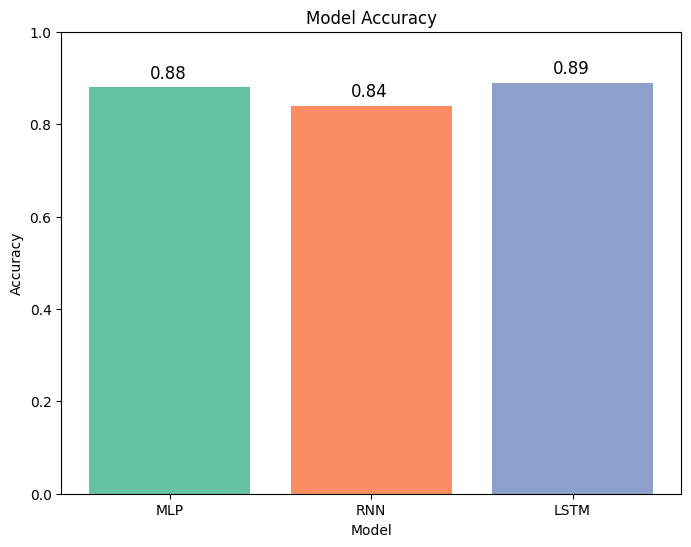

In [ ]:
import matplotlib.pyplot as plt

# Nama model
models = ['MLP', 'RNN', 'LSTM']

# Accuracy dari masing-masing model
accuracy = [0.88, 0.84, 0.89]

# Warna yang lebih lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1

# Menambahkan nilai akurasi di atas setiap bar
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

plt.show()


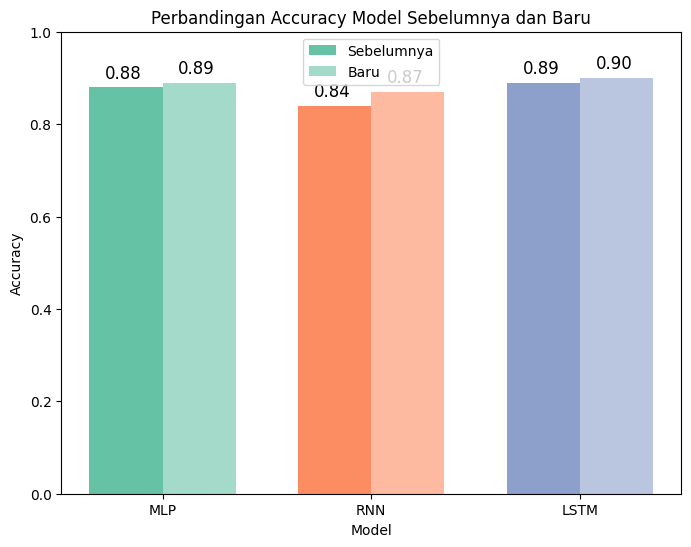

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nama model
models = ['MLP', 'RNN', 'LSTM']

# Data akurasi sebelumnya
accuracy_sebelumnya = [0.88, 0.84, 0.89]

# Data akurasi yang baru
accuracy_baru = [0.89, 0.87, 0.90]

# Warna yang lebih lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Membuat plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

bar1 = plt.bar(index, accuracy_sebelumnya, bar_width, color=colors, label='Sebelumnya')
bar2 = plt.bar(index + bar_width, accuracy_baru, bar_width, color=colors, alpha=0.6, label='Baru')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Accuracy Model Sebelumnya dan Baru')
plt.xticks(index + bar_width / 2, models)
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1
plt.legend()

# Menambahkan nilai akurasi di atas setiap bar
for bar, acc in zip(bar1, accuracy_sebelumnya):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

for bar, acc in zip(bar2, accuracy_baru):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

plt.show()



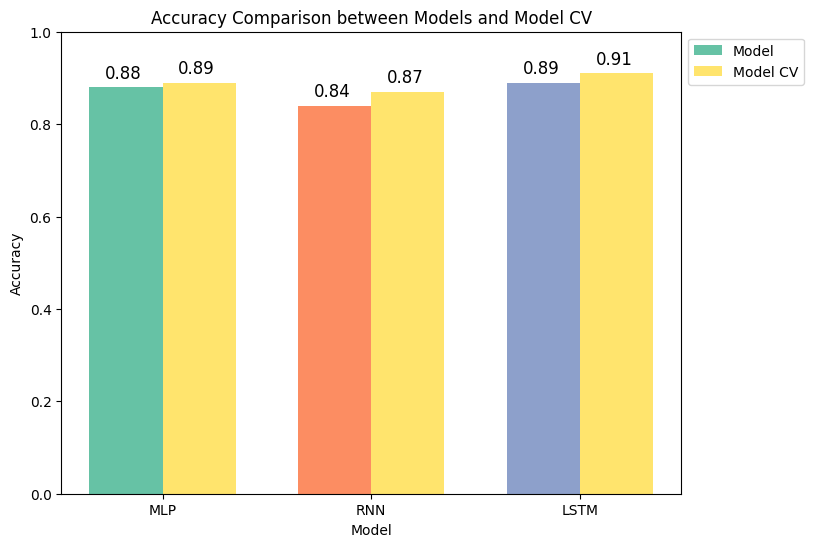

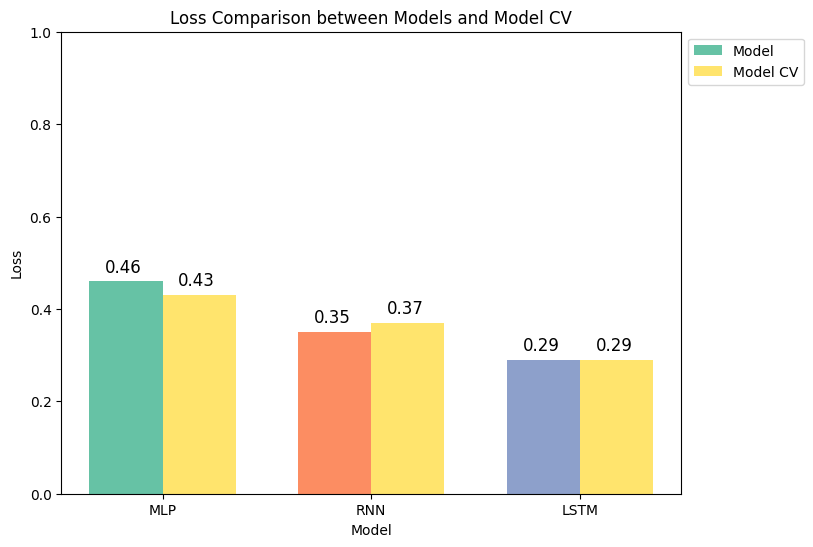

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Nama model
models = ['MLP', 'RNN', 'LSTM']

# Data akurasi untuned
accuracy = [0.88, 0.84, 0.89]

# Data akurasi yang tuned
cv_accuracy = [0.89, 0.87, 0.91]

# Data loss untuned
loss = [0.46, 0.35, 0.29]

# Data loss yang tuned
cv_loss = [0.43, 0.37, 0.29]

# Warna yang lebih lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Membuat plot akurasi
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

bar1 = plt.bar(index, accuracy, bar_width, color=colors, label='Model')
bar2 = plt.bar(index + bar_width, cv_accuracy, bar_width, color='#ffd92f', label='Model CV', alpha=0.7)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Models and Model CV')
plt.xticks(index + bar_width / 2, models)
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1

# Menambahkan nilai akurasi di atas setiap bar
for bar, acc in zip(bar1, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

for bar, acc in zip(bar2, cv_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

# Menambahkan legenda di luar plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

# Membuat plot loss
plt.figure(figsize=(8, 6))

bar1 = plt.bar(index, loss, bar_width, color=colors, label='Model')
bar2 = plt.bar(index + bar_width, cv_loss, bar_width, color='#ffd92f', label='Model CV', alpha=0.7)

plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss Comparison between Models and Model CV')
plt.xticks(index + bar_width / 2, models)
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1

# Menambahkan nilai loss di atas setiap bar
for bar, l in zip(bar1, loss):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{l:.2f}', fontsize=12)

for bar, l in zip(bar2, cv_loss):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{l:.2f}', fontsize=12)

# Menambahkan legenda di luar plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


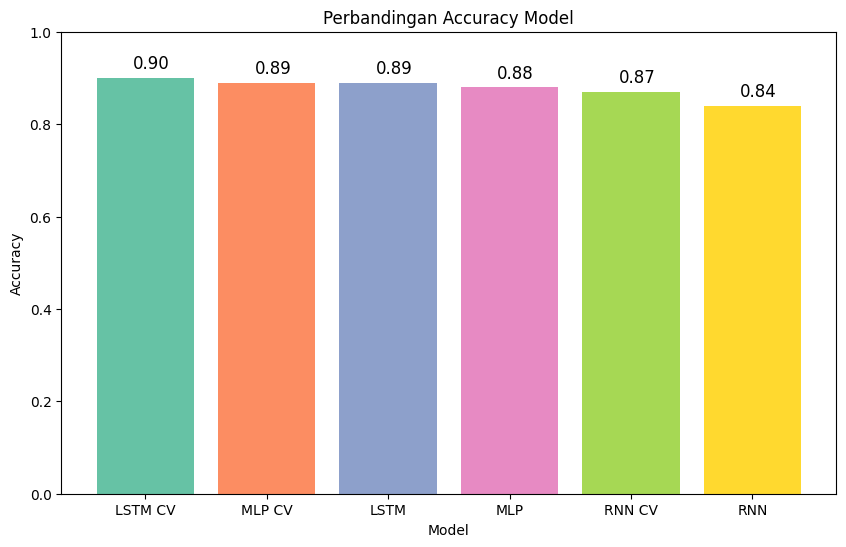

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nama model
models = ['MLP', 'RNN', 'LSTM', 'MLP CV', 'RNN CV', 'LSTM CV']

# Nilai akurasi
accuracy = [0.88, 0.84, 0.89, 0.89, 0.87, 0.90]

# Warna yang lebih lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Mengurutkan model berdasarkan nilai akurasi
sorted_indices = np.argsort(accuracy)[::-1]  # Mengurutkan secara menurun
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracy = [accuracy[i] for i in sorted_indices]

# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_accuracy, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Accuracy Model')
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1

# Menambahkan nilai akurasi di atas setiap bar
for bar, acc in zip(bars, sorted_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

plt.show()


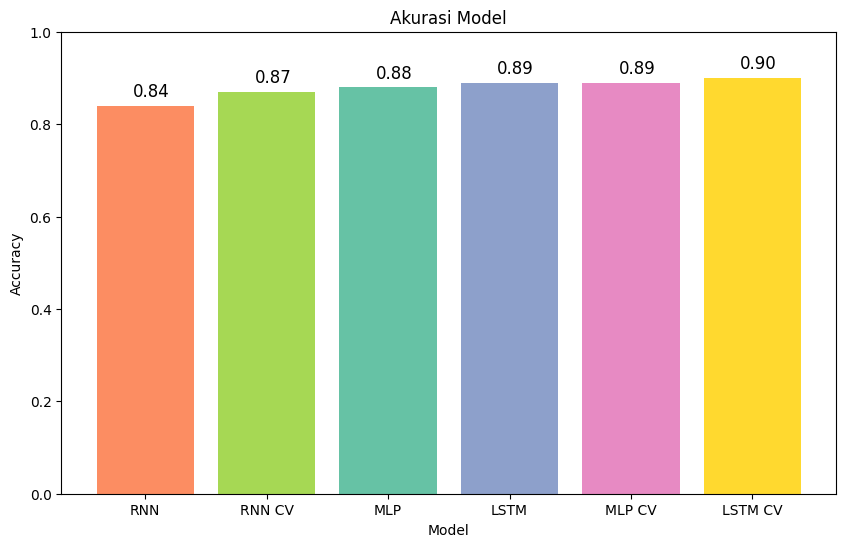

In [ ]:
import matplotlib.pyplot as plt

# Nama model
models = ['MLP', 'RNN', 'LSTM', 'MLP CV', 'RNN CV', 'LSTM CV']

# Nilai akurasi
accuracy = [0.88, 0.84, 0.89, 0.89, 0.87, 0.90]

# Warna yang lebih lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Mengurutkan model berdasarkan akurasi
sorted_indices = sorted(range(len(accuracy)), key=lambda i: accuracy[i])
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracy = [accuracy[i] for i in sorted_indices]

# Membuat plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_accuracy, color=[colors[i] for i in sorted_indices])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Akurasi Model')
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1

# Menambahkan nilai akurasi di atas setiap bar
for bar, acc in zip(bars, sorted_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

plt.show()


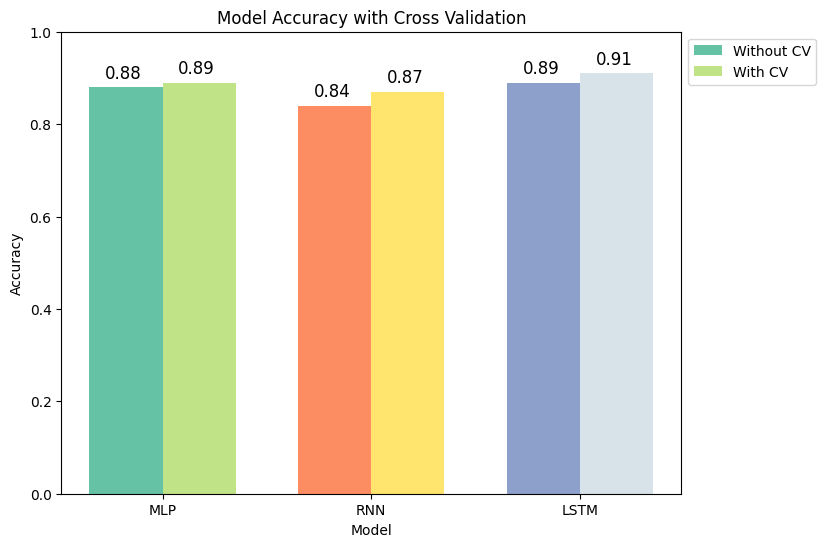

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Nama model
models = ['MLP', 'RNN', 'LSTM']

# Data akurasi untuk model sebelumnya
accuracy = [0.88, 0.84, 0.89]

# Data akurasi untuk model CV
cv_accuracy = [0.89, 0.87, 0.91]

# Warna yang lebih lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Warna yang lebih muda untuk model CV
cv_colors = ['#a6d854', '#ffd92f', '#c7d6e1']

# Membuat plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

bar1 = plt.bar(index, accuracy, bar_width, color=colors, label='Without CV')
bar2 = plt.bar(index + bar_width, cv_accuracy, bar_width, color=cv_colors, alpha=0.7, label='With CV')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Cross Validation')
plt.xticks(index + bar_width / 2, models)
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1

# Menambahkan nilai akurasi di atas setiap bar
for bar, acc in zip(bar1, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

for bar, acc in zip(bar2, cv_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.2f}', fontsize=12)

# Menambahkan legenda di luar plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


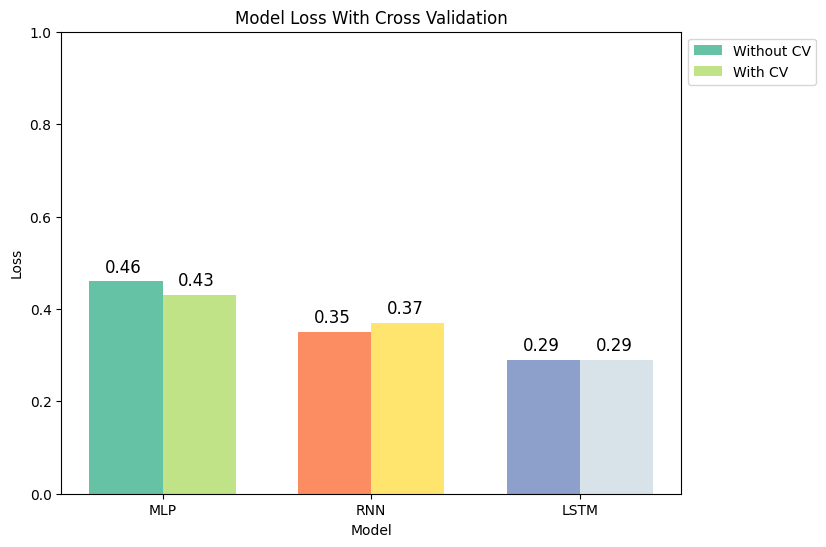

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Nama model
models = ['MLP', 'RNN', 'LSTM']

# Data kerugian untuk model sebelumnya
loss = [0.46, 0.35, 0.29]

# Data kerugian untuk model CV
cv_loss = [0.43, 0.37, 0.29]

# Warna yang lebih lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Warna yang lebih muda untuk model CV
cv_colors = ['#a6d854', '#ffd92f', '#c7d6e1']

# Membuat plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

bar1 = plt.bar(index, loss, bar_width, color=colors, label='Without CV')
bar2 = plt.bar(index + bar_width, cv_loss, bar_width, color=cv_colors, alpha=0.7, label='With CV')

plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Model Loss With Cross Validation')
plt.xticks(index + bar_width / 2, models)
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1

# Menambahkan nilai kerugian di atas setiap bar
for bar, l in zip(bar1, loss):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{l:.2f}', fontsize=12)

for bar, l in zip(bar2, cv_loss):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{l:.2f}', fontsize=12)

# Menambahkan legenda di luar plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


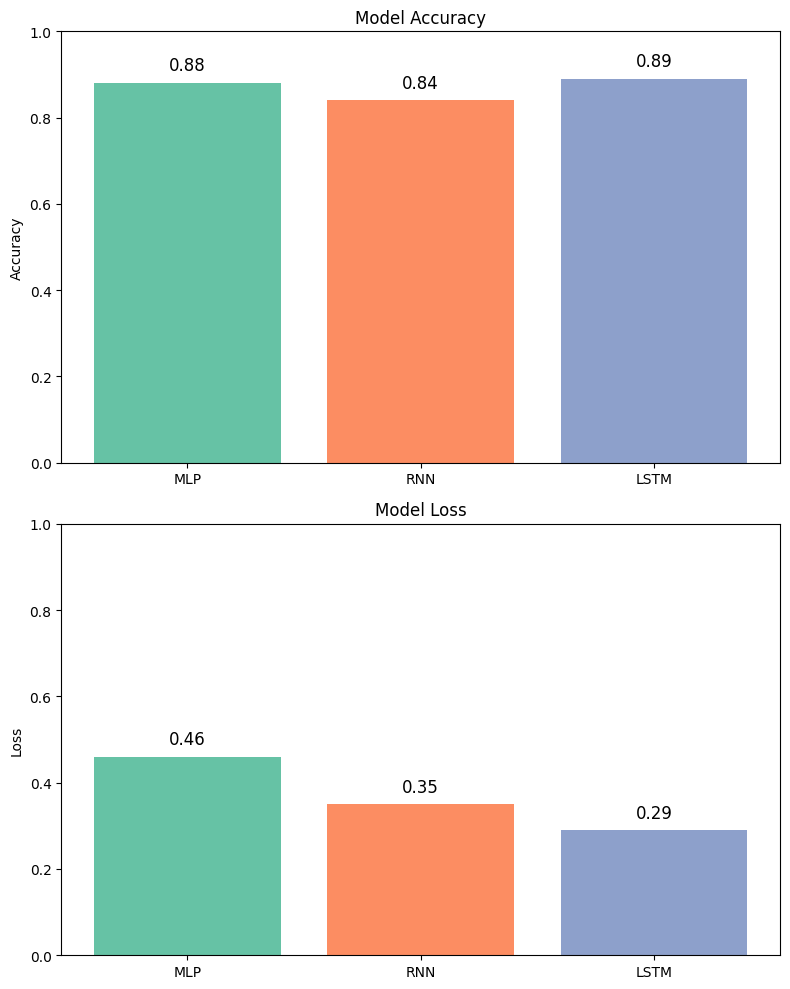

In [19]:
import matplotlib.pyplot as plt

# Data
models = ['MLP', 'RNN', 'LSTM']
accuracy = [0.88, 0.84, 0.89]
loss = [0.46, 0.35, 0.29]

# Soft colors
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plot Accuracy
axes[0].bar(models, accuracy, color=colors)
axes[0].set_ylim(0, 1)  # Set the same y-axis range for both plots
axes[0].set_ylabel('Accuracy')
for i, acc in enumerate(accuracy):
    axes[0].text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

# Plot Loss
axes[1].bar(models, loss, color=colors)
axes[1].set_ylim(0, 1)  # Set the same y-axis range for both plots
axes[1].set_ylabel('Loss')
for i, l in enumerate(loss):
    axes[1].text(i, l + 0.02, f'{l:.2f}', ha='center', va='bottom', fontsize=12)

# Add titles
axes[0].set_title('Model Accuracy')
axes[1].set_title('Model Loss')

# Show the plots
plt.tight_layout()
plt.show()


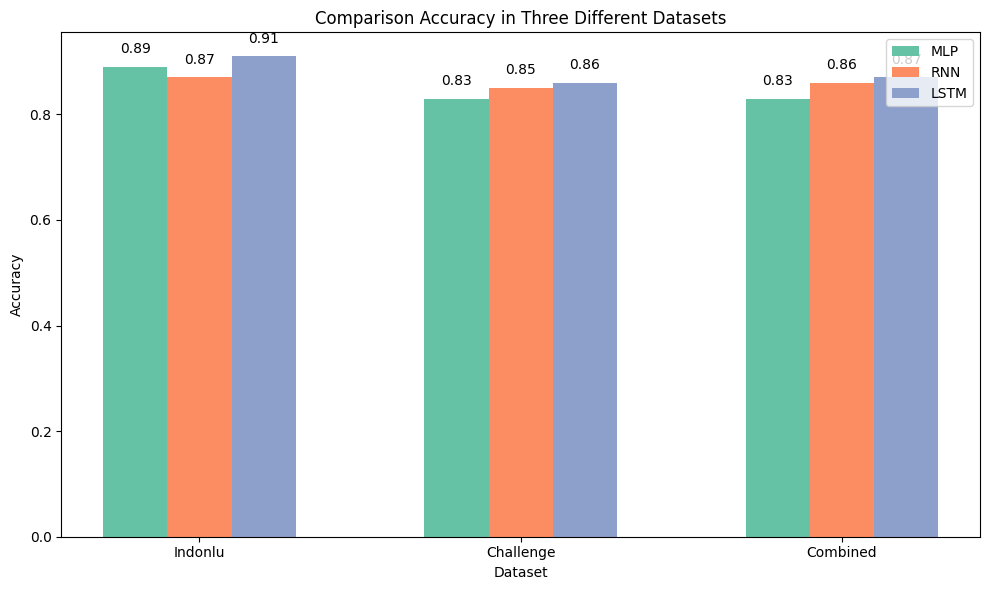

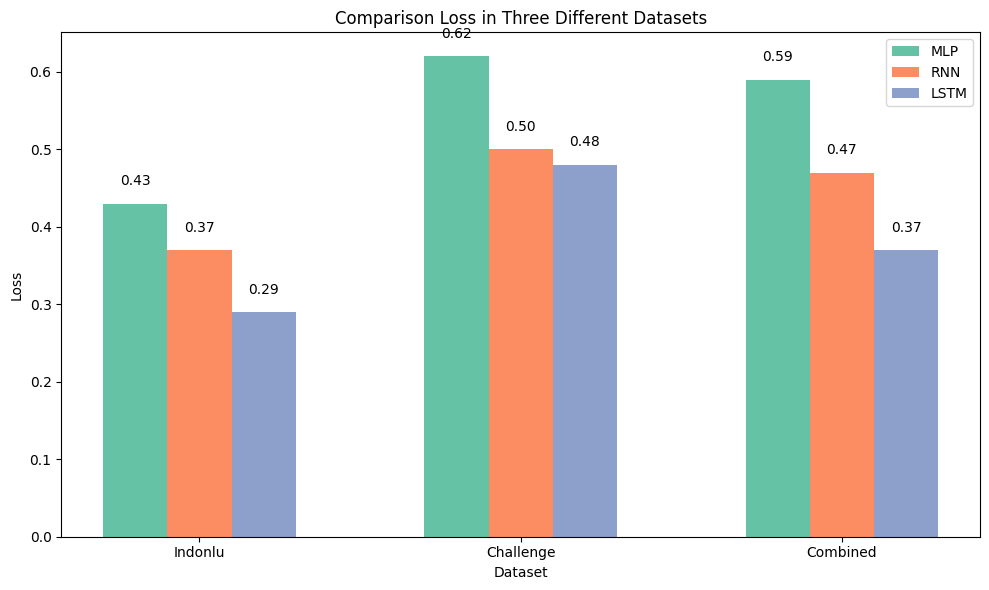

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Nama dataset
datasets = ['Indonlu', 'Challenge', 'Combined']

# Data akurasi untuk masing-masing model
mlp_accuracy = [0.89, 0.83, 0.83]
rnn_accuracy = [0.87, 0.85, 0.86]
lstm_accuracy = [0.91, 0.86, 0.87]

# Data kerugian untuk masing-masing model
mlp_loss = [0.43, 0.62, 0.59]
rnn_loss = [0.37, 0.50, 0.47]
lstm_loss = [0.29, 0.48, 0.37]

# Warna yang lembut
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Membuat plot akurasi
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(datasets))

plt.bar(index - bar_width, mlp_accuracy, bar_width, color=colors[0], label='MLP')
plt.bar(index, rnn_accuracy, bar_width, color=colors[1], label='RNN')
plt.bar(index + bar_width, lstm_accuracy, bar_width, color=colors[2], label='LSTM')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison Accuracy in Three Different Datasets')
plt.xticks(index, datasets)

# Menambahkan angka akurasi di atas setiap bar
for i, acc in enumerate(mlp_accuracy):
    plt.text(index[i] - bar_width, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

for i, acc in enumerate(rnn_accuracy):
    plt.text(index[i], acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

for i, acc in enumerate(lstm_accuracy):
    plt.text(index[i] + bar_width, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend()

plt.tight_layout()
plt.show()

# Membuat plot loss
plt.figure(figsize=(10, 6))

plt.bar(index - bar_width, mlp_loss, bar_width, color=colors[0], label='MLP')
plt.bar(index, rnn_loss, bar_width, color=colors[1], label='RNN')
plt.bar(index + bar_width, lstm_loss, bar_width, color=colors[2], label='LSTM')

plt.xlabel('Dataset')
plt.ylabel('Loss')
plt.title('Comparison Loss in Three Different Datasets')
plt.xticks(index, datasets)

# Menambahkan angka loss di atas setiap bar
for i, loss_val in enumerate(mlp_loss):
    plt.text(index[i] - bar_width, loss_val + 0.02, f'{loss_val:.2f}', ha='center', va='bottom', fontsize=10)

for i, loss_val in enumerate(rnn_loss):
    plt.text(index[i], loss_val + 0.02, f'{loss_val:.2f}', ha='center', va='bottom', fontsize=10)

for i, loss_val in enumerate(lstm_loss):
    plt.text(index[i] + bar_width, loss_val + 0.02, f'{loss_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend()

plt.tight_layout()
plt.show()
